In [1]:
import sys
# if not installing the library:
# sys.path.insert(0, '<your-directory>/IBIS-Compton-mode-test/')

import glob
from comibis.utils import *
from comibis.polar import *
from comibis.spec import *

# Import raw flux data and response

6389 scw found
['190-200' '200-210' '210-220' '220-230' '230-240' '240-250' '250-260'
 '260-270' '270-280' '280-290' '290-300' '300-350' '350-400' '400-500'
 '500-600' '600-700' '700-800' '800-1000' '1000-1500' '1500-2000'
 '2000-2500' '2500-3000']


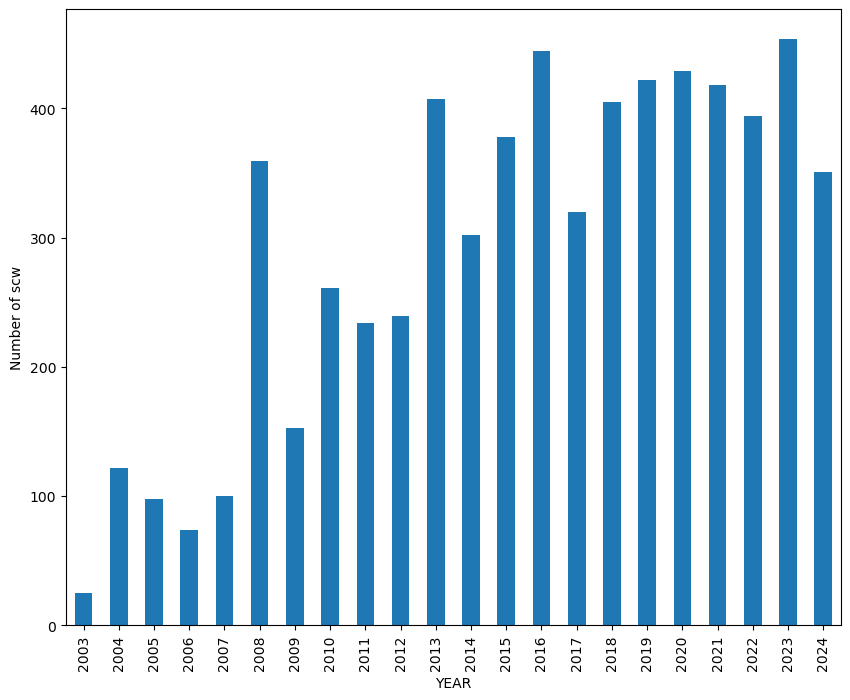

In [2]:
src ='crab' # short-hand name of source
scw_file_name_list = ['lowe3_all'] # several df can be combined (energy/pola binnings need to match)

resp_dir= 'compton_responses'
saved_pola_dir = 'saved_pola_df'
spicorr_file = 'compcorr_2YEAR_5deg.csv' # correction file with alpha/beta paramaters

fig, ax= plt.subplots(1,1,figsize=(10,8))
df_spicorr = pd.read_csv(f'{resp_dir}/{spicorr_file}', index_col=0)
df_pola_scw, all_band_names = charge_df(src, scw_file_name_list, saved_pola_dir, df_spicorr)
df_spicorr_rbn, rbn_compcorr_matrix = rebin_compcorr(df_spicorr, all_band_names)

# Select the data, compute polarigrams

some further selection on off-axis angle, date, revolution number can be done here, using the scw_selection function

In [14]:
##### Selections #####

date_type, start_date, end_date= 'ISOT', '2010-01-01', '2020-01-01'
rev_list = None # to select from a list of revolutions
angle_max = 5. # max off-axis angle

df_pola_scw_sel = scw_selection(df_pola_scw, angle_max=angle_max, rev_list=rev_list, start_date=start_date, end_date=end_date, date_type=date_type)

#### Build polarigrams ####
compnorm , spicorr = 'auto', 'auto' # normal correction (standard)
# compnorm, spicorr = 1., 'auto' # without alpha parameters
all_polarigrams = Polarigram(df_pola_scw_sel, all_band_names, angle_max) # initialize polarigrams
all_polarigrams.import_prf(pulsefrac_dir=resp_dir, pulsefrac_file='comps-prf-2.txt') # import polarization response
print(f'{len(df_pola_scw_sel.SCW.unique())} scw selected (avg off-axis angle = {df_pola_scw_sel.ANGLE.mean():.1f}°)')
print(f'Exposure = {all_polarigrams.expo/1000:.0f} ks')
all_polarigrams.make_polar(spicorr, compnorm, df_spicorr_rbn) # compute all polarigrams

2407 scw selected (avg off-axis angle = 3.4°)
Exposure = 5748 ks


# Energy evolution

Show polarization (PA, PF) as a function of energy.

energy bands: can be set to 'all' to make a polarigram of each energy band, without combining them, or a list of energy bands.

pa_ref: can be chosen between PA_ref90 (PAs between [0, 180]°) or PA_ref0 (PAs between [-90, 90]°).

errortype: 'margin' is recommended as it uses marginalized posterior, otherwise 'like' will find uncertainties from likelihood

Other parameters should be kept at default values.

Polarized flux in 200 - 300 keV band
reduced chi2: pola=0.61, no pola=17.70
initial PF = 63.56 %
total flux = 1.3e-01 ± 4.9e-03 ct/s
SNR = 73.3 p-value = 5.6e-27 (10.8-sigma)
PA = 127.9 ± 2.7 °
PF = 63.3 (+5.7/-5.8) %


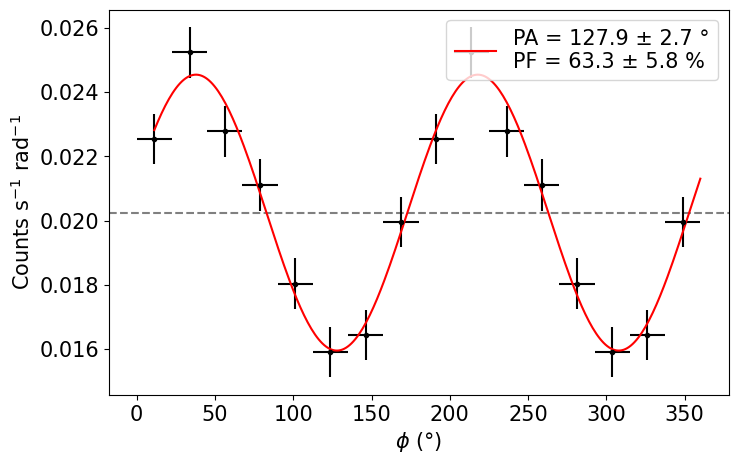

Polarized flux in 300 - 400 keV band
reduced chi2: pola=0.35, no pola=1.71
initial PF = 40.34 %
total flux = 1.2e-01 ± 8.3e-03 ct/s
SNR = 39.9 p-value = 6.0e-03 (2.7-sigma)
PA = 141.6 ± 9.8 °
PF = 38.2 (+13.0/-13.1) %


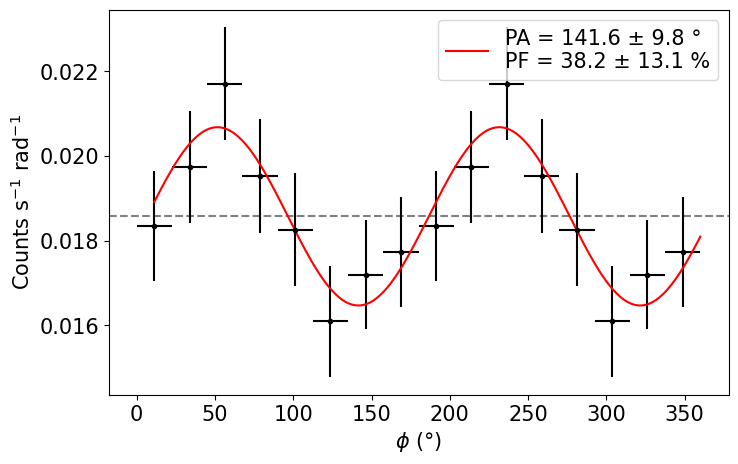

Polarized flux in 400 - 1000 keV band
reduced chi2: pola=2.19, no pola=2.19
initial PF = 37.87 %
total flux = 1.8e-01 ± 1.4e-02 ct/s
SNR = 34.7 p-value = 1.1e-01 (1.6-sigma)
PF < 54.9 % (upper-limit at 99 %)
PA = nan ± 0.0 °
PF = 54.9 (+10.0/-10.0) %


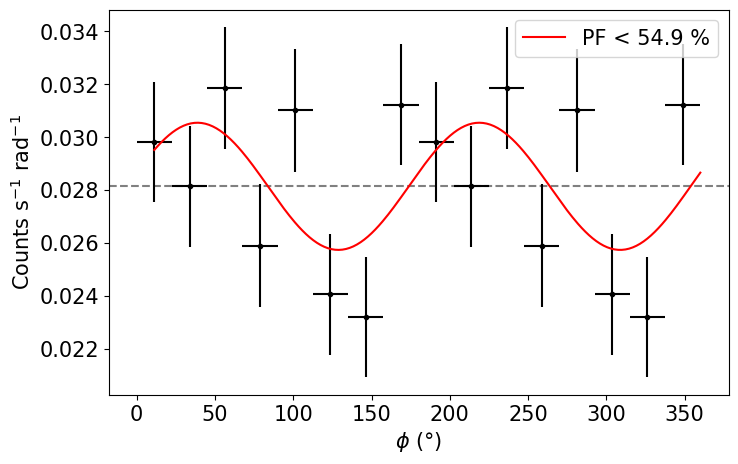

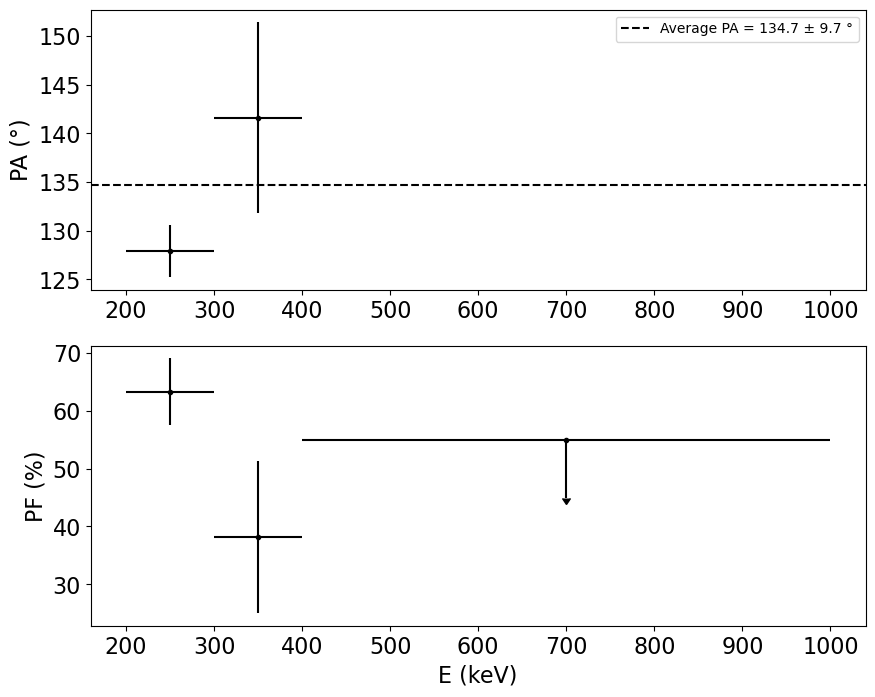

In [15]:
energy_bands = [ '200-300','300-400','400-1000'] # energy bands in keV
# energy_bands = 'all'
pa_ref = 'PA_ref90' # reference angle
p_det = .01 # threshold for polarization detection, usually 1%
p_lim = .01 # probability to use for upper-limits, usually 1%
SNR_threshold = 13. # SNR threshold for flux detection
verbose = 0
errortype = 'margin'

all_polarigrams.pola_espectrum(energy_bands, pa_ref, SNR_threshold, p_det, p_lim, 1, verbose, errortype)
all_polarigrams.plot_pola_espectrum(plot_scale='lin', plot_percent=True)

# Single polarigram

to analyze a single energy band

Polarized flux in 200 - 250 keV band
reduced chi2: pola=1.28, no pola=10.94
initial PF = 53.12 %
total flux = 5.6e-02 ± 2.4e-03 ct/s
SNR = 65.1 p-value = 5.3e-16 (8.1-sigma)
PA = 129.8 ± 3.5 °
PF = 52.7 (+6.3/-6.3) %


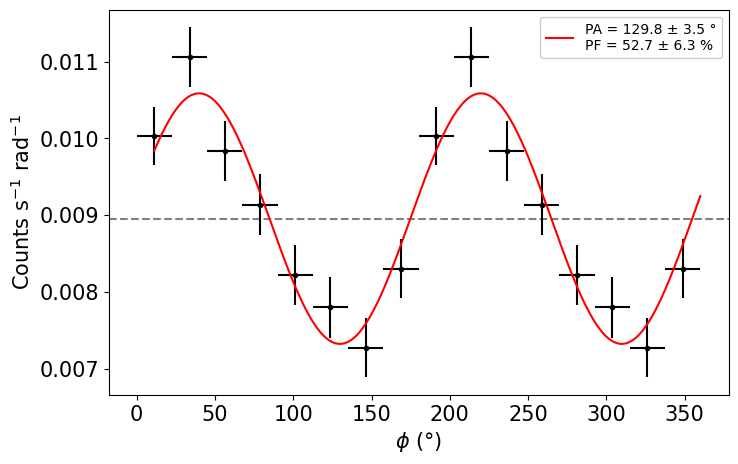

In [16]:
Emin, Emax = 200, 250

pa_ref='PA_ref90'
errortype = 'margin'
p_det = .01
p_lim = .01
SNR_threshold = 13.

bands = all_polarigrams.combine_bands(Emin, Emax)
pola_dico, ax = all_polarigrams.fit_pola(bands, p_det, p_lim, folded=1, weighted=1, pa_ref=pa_ref, verbose=True, article=0, plot_0=True, errortype=errortype)
ax.legend(framealpha=1., loc='upper right')

show the 2D contours of the delta negative log-likelihood

(0.0, 100.0)

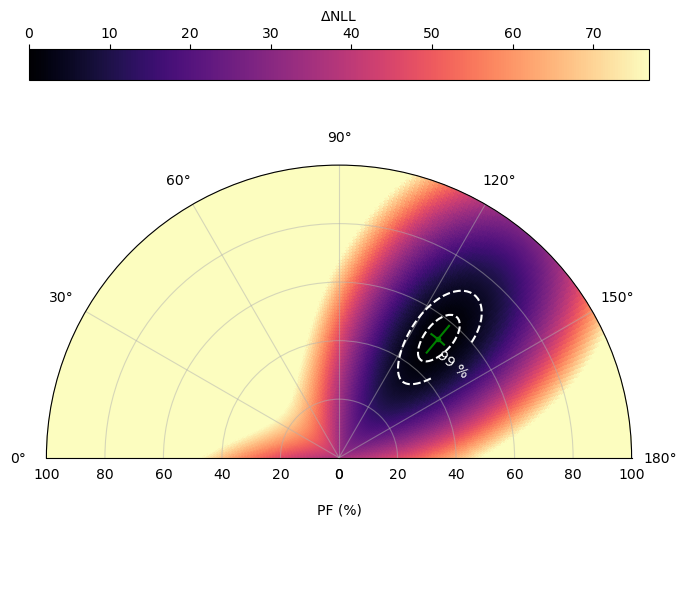

In [17]:
ax = all_polarigrams.plot_nll(n_grid = 200, list_p_contour=[.68, .99], cmap='magma', vmax_fact=1., polar_plot=True, only_contour=0)
ax.set_rlim(0,100)

# Time evolution

The data set can be cut in different groups of revolutions (REV), years, or science windows (scw)

The groups can be given directly in a dictionary (ex: crab_year_groups), or as a number. In that case, the groups will be created chronologicaly with the same number of elements (year, revs, ...).

Results are recorded in df_param_select and plotted with time.

22 unique YEAR found: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023 2024]
6 select list found:[[2004, 2005, 2006, 2007, 2008, 2009], [2010, 2011, 2012, 2013, 2014], [2015, 2016], [2017, 2018], [2019, 2020, 2021, 2022], [2023, 2024]]


****** ------------------------------------------------------------------------- ******

Polarigram of YEAR 2004 - 2009
Exposure = 1394 ks
Start = MJD 53069.810241 Stop = MJD 55072.534304
Average SpiCorr = 0.724
['200-210', '210-220', '220-230', '230-240', '240-250', '250-260', '260-270', '270-280', '280-290', '290-300', '300-350', '350-400']
Polarized flux in 200 - 400 keV band
reduced chi2: pola=2.26, no pola=3.81
initial PF = 54.86 %
total flux = 2.5e-01 ± 2.0e-02 ct/s
SNR = 34.8 p-value = 4.5e-04 (3.5-sigma)
PA = 142.2 ± 7.7 °
PF = 53.0 (+14.2/-14.2) %


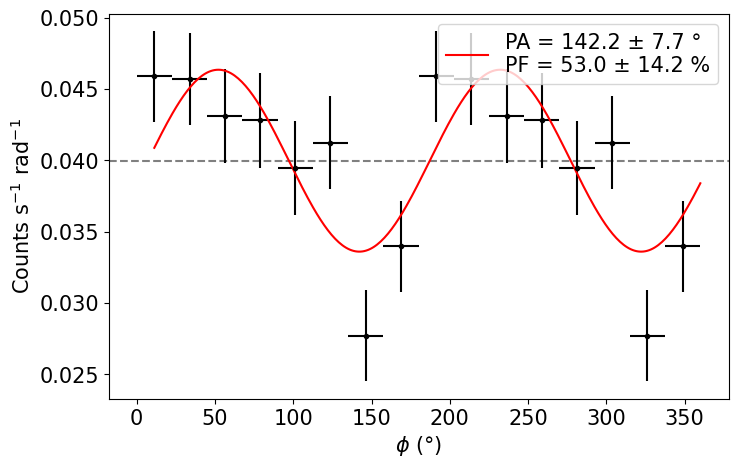



****** ------------------------------------------------------------------------- ******

Polarigram of YEAR 2010 - 2014
Exposure = 2032 ks
Start = MJD 55258.770609 Stop = MJD 56952.113972
Average SpiCorr = 0.696
['200-210', '210-220', '220-230', '230-240', '240-250', '250-260', '260-270', '270-280', '280-290', '290-300', '300-350', '350-400']
Polarized flux in 200 - 400 keV band
reduced chi2: pola=0.76, no pola=2.14
initial PF = 34.08 %
total flux = 2.5e-01 ± 1.5e-02 ct/s
SNR = 47.7 p-value = 3.8e-03 (2.9-sigma)
PA = 130.6 ± 9.3 °
PF = 32.4 (+10.4/-10.7) %


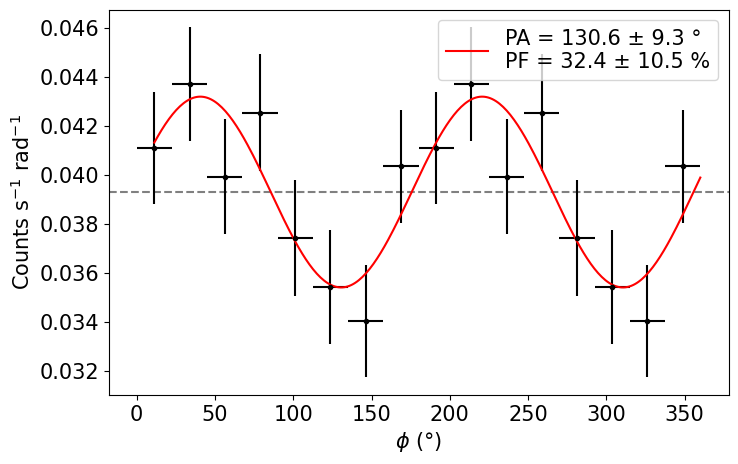



****** ------------------------------------------------------------------------- ******

Polarigram of YEAR 2015 - 2016
Exposure = 1618 ks
Start = MJD 57068.571139 Stop = MJD 57675.334902
Average SpiCorr = 0.711
['200-210', '210-220', '220-230', '230-240', '240-250', '250-260', '260-270', '270-280', '280-290', '290-300', '300-350', '350-400']
Polarized flux in 200 - 400 keV band
reduced chi2: pola=0.57, no pola=3.43
initial PF = 49.88 %
total flux = 2.5e-01 ± 1.6e-02 ct/s
SNR = 44.8 p-value = 2.6e-05 (4.2-sigma)
PA = 132.1 ± 6.5 °
PF = 48.7 (+10.8/-11.1) %


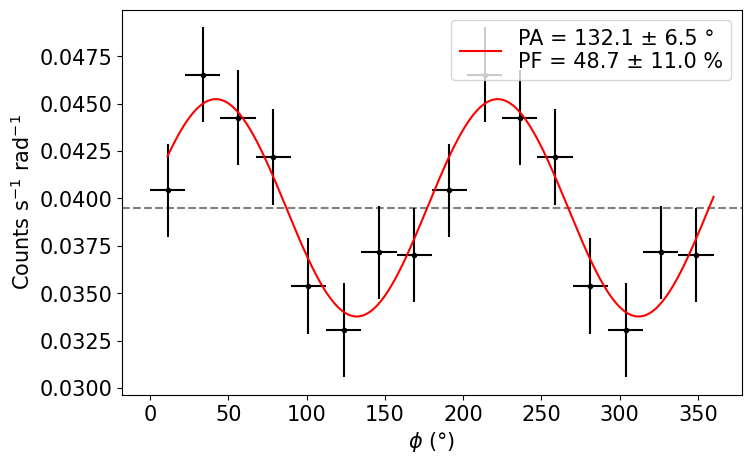



****** ------------------------------------------------------------------------- ******

Polarigram of YEAR 2017 - 2018
Exposure = 1412 ks
Start = MJD 57794.597163 Stop = MJD 58404.044227
Average SpiCorr = 0.787
['200-210', '210-220', '220-230', '230-240', '240-250', '250-260', '260-270', '270-280', '280-290', '290-300', '300-350', '350-400']
Polarized flux in 200 - 400 keV band
reduced chi2: pola=1.04, no pola=3.47
initial PF = 67.05 %
total flux = 2.5e-01 ± 2.2e-02 ct/s
SNR = 31.7 p-value = 7.2e-05 (4.0-sigma)
PA = 125.0 ± 6.9 °
PF = 65.2 (+15.2/-15.4) %


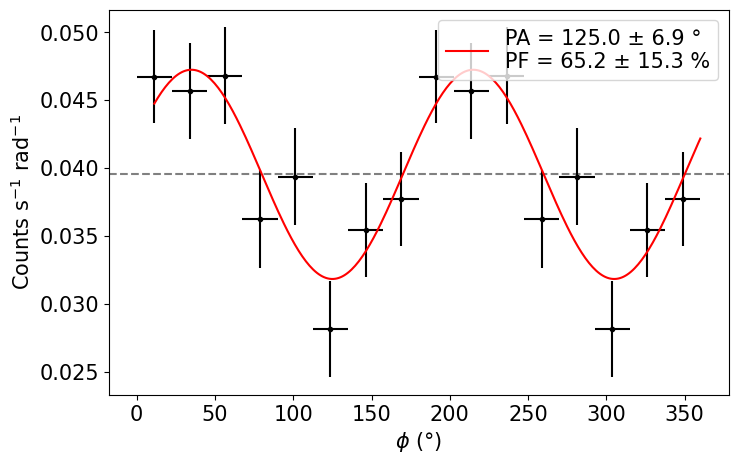



****** ------------------------------------------------------------------------- ******

Polarigram of YEAR 2019 - 2022
Exposure = 3026 ks
Start = MJD 58531.160923 Stop = MJD 59880.522355
Average SpiCorr = 0.818
['200-210', '210-220', '220-230', '230-240', '240-250', '250-260', '260-270', '270-280', '280-290', '290-300', '300-350', '350-400']
Polarized flux in 200 - 400 keV band
reduced chi2: pola=0.56, no pola=2.33
initial PF = 45.87 %
total flux = 2.5e-01 ± 1.8e-02 ct/s
SNR = 39.0 p-value = 1.1e-03 (3.3-sigma)
PA = 136.6 ± 8.3 °
PF = 44.1 (+12.6/-12.9) %


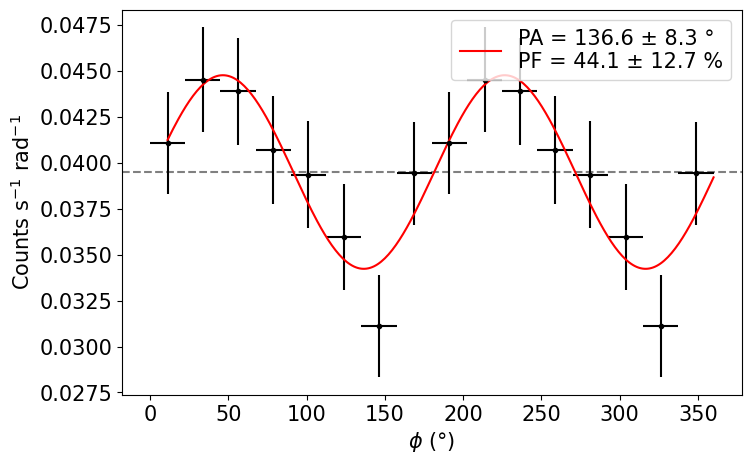



****** ------------------------------------------------------------------------- ******

Polarigram of YEAR 2023 - 2024
Exposure = 1412 ks
Start = MJD 59989.427569 Stop = MJD 60594.577823
Average SpiCorr = 0.778
['200-210', '210-220', '220-230', '230-240', '240-250', '250-260', '260-270', '270-280', '280-290', '290-300', '300-350', '350-400']
Polarized flux in 200 - 400 keV band
reduced chi2: pola=2.57, no pola=4.12
initial PF = 55.98 %
total flux = 2.5e-01 ± 2.0e-02 ct/s
SNR = 34.8 p-value = 3.3e-04 (3.6-sigma)
PA = 122.7 ± 7.5 °
PF = 54.1 (+14.0/-14.4) %


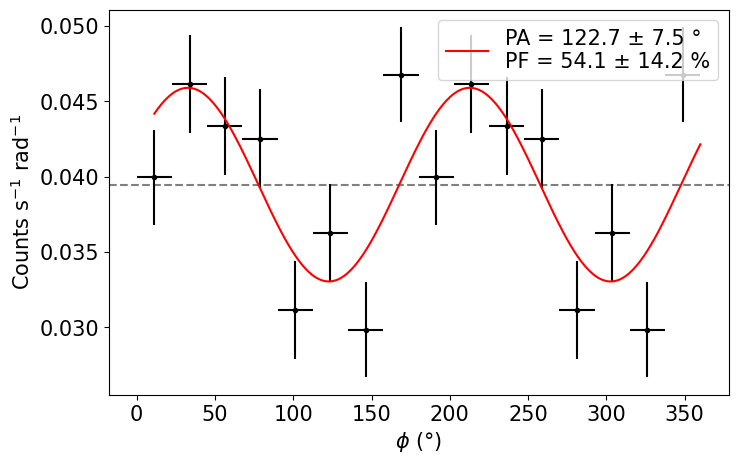

,SNR,k2,PA,PA_err,uplim,EXPO,PF_pct,PF_pct_err,p_higher
0,34.794309,605.504636,142.189497,7.652126,0,1.394745e+06,52.984530,14.211142,0.000452
1,47.661994,1136.022042,130.636288,9.252570,0,2.032375e+06,32.434324,10.530105,0.003756
2,44.788316,1003.098779,132.086691,6.451792,0,1.618841e+06,48.650487,10.953610,0.000026
3,31.680261,501.957454,124.984718,6.851903,0,1.412483e+06,65.213652,15.266653,0.000072
4,39.038906,762.430843,136.587941,8.252292,0,3.026651e+06,44.074441,12.734127,0.001130
5,34.785614,605.170293,122.684079,7.502084,0,1.412410e+06,54.148541,14.190642,0.000328


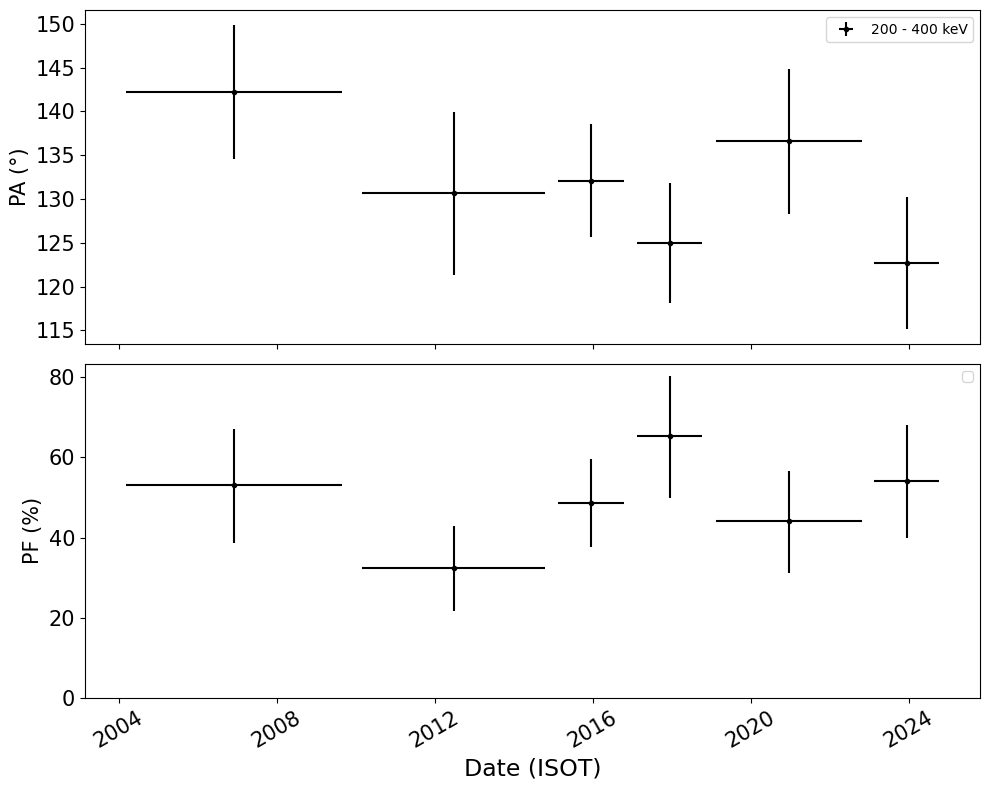

In [ ]:
crab_year_groups = {'1':[2004,2005,2006,2007,2008,2009], '2':[2010,2011,2012,2013,2014],'3':[2015,2016],
          '4':[2017,2018], '5':[2019,2020,2021,2022], '6':[2023,2024]}

all_src_dico={ # 'src name': [energy range, group list dictionary, reference angle, states (optional)]
              'crab':[[200, 400], crab_year_groups, 'PA_ref90', None],
              # 'crab':[[200, 400], 31, 'PA_ref90', None] # if no group list
              }


src_name = 'crab'
column_name = 'YEAR' # group by YEAR, REV or SCW
date_type = 'ISOT' # or MJD
# other informations to plot
with_proba = 0 # p-value
with_expo = 0 # exposure

compnorm , spicorr = 'auto',  'auto'
errortype='margin'
p_det = 0.01
p_lim = 0.01
angle_max = 5.
SNR_threshold=13.
verbose=1

grp = all_src_dico[src_name][1]
states_mjd = all_src_dico[src_name][3]

df_pola_scw_sel = df_pola_scw[df_pola_scw.ISOT > '2003-06-01'] # default start date
all_unique = np.sort(df_pola_scw_sel[column_name].unique())[:]
print(f'{len(all_unique)} unique {column_name} found: {all_unique}')

if type(grp) == int:
  select_list, select_names= [list(all_unique)[i*grp:(i+1)*grp] for i in range(len(all_unique)//grp+(len(all_unique)%grp>0))], None
else: select_list, select_names= list(grp.values()), list(grp.keys())
print(f'{len(select_list)} select list found:{select_list}')
# compute polarization for each period
df_param_select = pola_select(df_pola_scw_sel, all_src_dico[src_name], all_band_names, angle_max, column_name, select_list,
                             spicorr, compnorm, .14, 'comps-prf-2.txt', df_spicorr_rbn, resp_dir,errortype, SNR_threshold, 1, p_det,p_lim, verbose)
# plot polarization with time
axes = plot_pola_select(df_param_select, all_src_dico[src_name], plot_percent=True, with_proba=with_proba, with_snr=0,
                        with_expo=with_expo, jet_angle=None, date_type='ISOT')
df_param_select[['SNR', 'PA',	'PA_err', 'uplim','EXPO','PF_pct',	'PF_pct_err','p_higher']]